   #                            Exploring the Titanic Dataset
                                     

My goal in this project is to investigate which factors will make people more likely to survive the titanic tragedy. The titanic dataset used in this project contains 891 sample data points, with 12 variables avaliable. Before conducting further analysis on individual variables, I would like to know whether there is any missing values in this dataset. By counting NaN values in each variable, it's found the Age variable contains 177 missing values and Cabin has 687. It's common to see missing data in dataset during data analysis, however including a vairable with 687 missing values in data analysis would lead to a bias result. So Cabin variable will be first removed from data analysis process.


In [174]:
# import titanic data into panda dataframe.
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')

# to get a general sense of all the variables, display the first five observations. 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
# get total number of records
from IPython.display import display
display(len(titanic_df.index))
# check NaN values in each column. 
display(titanic_df.isnull().sum())

891

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# I would like to know how survivors and victims are distributed in the whole dataset. 
titanic_df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

## Survival and Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

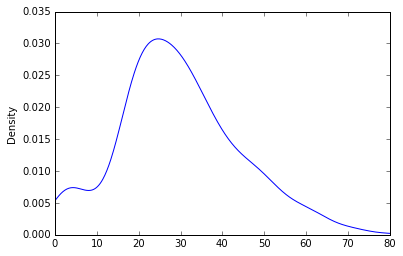

In [295]:
#titanic_df['Age'].hist()
display(titanic_df['Age'].dropna().describe())
titanic_df['Age'].plot(kind="density",
                       xlim= (0,80))

Most of passengers in this dataset are aged from 20 to 40. 
I am curious if the younger passengers are more likely to survive. 

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

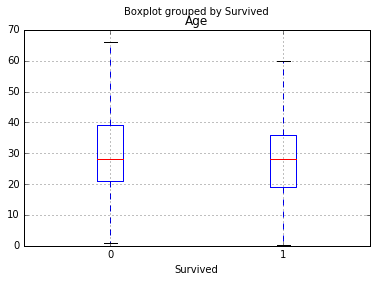

In [62]:
titanic_df.boxplot(column = 'Age', by = 'Survived',showfliers=False)
titanic_df.groupby('Survived')['Age'].mean()


As age boxplot and the group mean age shows, there is not a big age difference between survived and died group, which means the age may be not a good indicator on survival chance. However, instead of using the age variable direclty, I want to investiage the relationship between age and survival chance from a slightly different perpective. I will divide all the passengers into five groups based on their age: Baby, School Child, Adolescent, Adult and Senior. I am interested to see which group have highest survival rate. 

In [165]:
# create a function to divide the sample data into five groups based on their ages. 
def child_adult_group(age):
    if age <= 5:
        return 'Baby'
    elif age <=12:
        return 'School Child'
    elif age <=18:
        return 'Adolescent'
    elif age <=65:
        return 'Adult'
    else:
        return 'Senior'

# add a new variable to dataframe - Child_adult_group
titanic_df['Child_adult_group'] = titanic_df['Age'].apply(child_adult_group)
titanic_df[['Age','Child_adult_group']].head()


,Age,Child_adult_group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


In [172]:
#calculate survival rate of each age group. 
survived_agegroup = pd.crosstab(index=titanic_df['Child_adult_group'], 
                                columns=titanic_df['Survived'],
                                margins = True)
survived_agegroup.columns = ["died","survived","rowtotal"]
display(survived_agegroup)
survived_agegroup.div(survived_agegroup ["rowtotal"],
                   axis=0)


,died,survived,rowtotal
Child_adult_group,,,
Adolescent,40,30,70
Adult,348,219,567
Baby,13,31,44
School Child,16,9,25
senior,132,53,185
All,549,342,891


,died,survived,rowtotal
Child_adult_group,,,
Adolescent,0.571429,0.428571,1.0
Adult,0.613757,0.386243,1.0
Baby,0.295455,0.704545,1.0
School Child,0.640000,0.360000,1.0
senior,0.713514,0.286486,1.0
All,0.616162,0.383838,1.0


The child under 5 years old seems have higher chance to survive. Among 44 children under 5 years old, 31 survived. On the other hand, the senior passengers have lowest chance to survive among five age groups, with only 28 percent of senior passengers saved. 

## Fare and Passenger Class

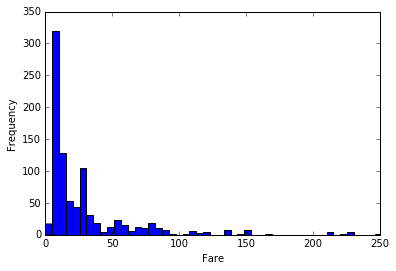

In [114]:
#plot fare variable for the whole dataset. 
import matplotlib.pyplot as plt
plt.hist(titanic_df['Fare'], bins = 100)
plt.xlim(0,250)
plt.xlabel('Fare')
plt.ylabel('Frequency')

As the fare plot shows, most of passengers' fare were under $50. My guess is the Fare variable is related to Pclass variable. The common sense is the passenger in class 1 will pay more. 

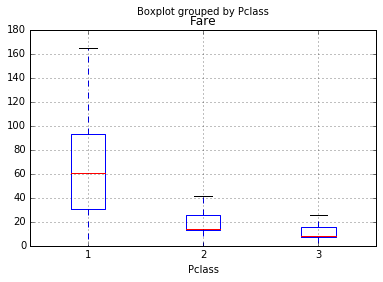

In [296]:
#Plot fare rate of different passenger class groups.   
fare_sr = titanic_df.groupby('Pclass').mean()['Fare']
fare_sr
titanic_df.boxplot(column = 'Fare', by = 'Pclass',showfliers=False)

Above fare-pclass boxplot illustrates how fare changes among different class groups. Obviously, the median fare paid by first-class passengers is significantly higher than the other two classes.

In [162]:
# Creat a table of Survival vs. Passenger class
survived_class = pd.crosstab(index=titanic_df['Pclass'], 
                           columns=titanic_df['Survived'],
                            margins=True)
survived_class.columns = ["died","survived","rowtotal"]
survived_class
survived_class.div(survived_class["rowtotal"],
                   axis=0)

,died,survived,rowtotal
Pclass,,,
1,0.370370,0.629630,1.0
2,0.527174,0.472826,1.0
3,0.757637,0.242363,1.0
All,0.616162,0.383838,1.0


In class 1, around 63 percent of passengers survived, whereas only 24 percent of class 3 passenger survived. Passenger class seems to have a significant impact on survival, so it would likely be useful to include as a feature in a predictive model.

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

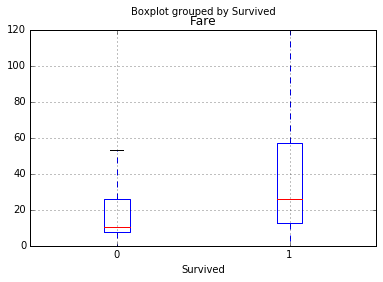

In [115]:
titanic_df.boxplot(column = 'Fare', by = 'Survived',showfliers=False)
titanic_df.groupby('Survived')['Fare'].mean()

Since the fare and pclass are related and pclass does have impact on survival rate, it does not surprise me that there is a big fare difference between survived group and unsurvived group. 

## Survival and Passenger Gender

In [133]:
# Creat a table of Survival vs. Sex
survived_sex = pd.crosstab(index=titanic_df['Sex'], 
                           columns=titanic_df['Survived'],
                           margins=True)

survived_sex.columns = ["died","survived","rowtotal"]
survived_sex.index= ["female","male","coltotal"]

display(survived_sex)

survived_sex.div(survived_sex["rowtotal"],
                   axis=0)

,died,survived,rowtotal
female,81,233,314
male,468,109,577
coltotal,549,342,891


,died,survived,rowtotal
female,0.257962,0.742038,1.0
male,0.811092,0.188908,1.0
coltotal,0.616162,0.383838,1.0


Obviously, the survival rate of female is much higher than male. Out of 314 female passengers, around 74 percent survived this tragedy, whereas only 19 percent of male were saved. The gender of passenger is an important indicator on whether he or she will survive.

According to above analysis, survival rate is highly related to both sex and passenger class. Next, I will investigate how these two variables contribute to the survival rate together. 

In [215]:
# create a table on survival rate by combintaiton of sex and passenger class.
surv_sex_class = pd.crosstab(index=titanic_df["Survived"], 
                             columns=[titanic_df["Pclass"],
                                      titanic_df["Sex"]],
                             margins=True) 
surv_sex_class.index= ["died","survived","coltotal"]
surv_sex_class
display(surv_sex_class)
perc_surv_sex_class = surv_sex_class/surv_sex_class.ix["coltotal"]
display(perc_surv_sex_class)


Pclass        1           2           3       All
Sex      female male female male female male     
died          3   77      6   91     72  300  549
survived     91   45     70   17     72   47  342
coltotal     94  122     76  108    144  347  891

Pclass           1                   2                3                 All
Sex         female      male    female      male female      male          
died      0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
survived  0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
coltotal  1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


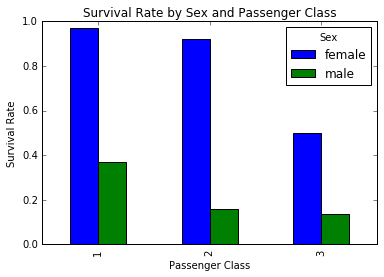

In [273]:
#Plot passenger survival rate by Sex and Class.

Surv_Pclass_sex = titanic_df.groupby(['Pclass','Sex'])['Survived'].sum()
Surv_Pclass_sex_size = titanic_df.groupby(['Pclass','Sex']).size()
percent = Surv_Pclass_sex/Surv_Pclass_sex_size
percent_df = percent.unstack()
display(percent_df)
percent_plot = percent_df.plot(kind = 'bar', 
                title = 'Survival Rate by Sex and Passenger Class')
percent_plot.set_xlabel('Passenger Class')
percent_plot.set_ylabel('Survival Rate')

#http://pbpython.com/simple-graphing-pandas.html


Taking both passenger gender and class level into account, the female passenger in class 1 has a very high survival rate, with 97 percent of females in class 1 survived this tragedy. On the other hand, in class 2 and class 3, the male passenger survival rate are only 15 percent and 13 percent respectively.

## Child/Parent and Siblings 

In next section, I will focus on investigating whether being with parent, child or siblings will make a difference in terms of survival chance. 

Instead of using specific number of children/parents and siblings, I will simply divide the all passengers into two groups:
Group with children/paretns and group without.
Group with siblings and group without.

In [278]:
# create a function to divide passengers into two groups based on whether they have children/parents/siblings or not. 
def Family_group(Parch):
    if Parch == 0:
        return 0
    else:
        return 1
titanic_df['Parch_group'] = titanic_df['Parch'].apply(Family_group)
titanic_df[['Parch','Parch_group']].head()


,Parch,Parch_group
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [277]:
surv_sex_parch = pd.crosstab(index=titanic_df["Survived"], 
                             columns=[titanic_df["Parch_group"],
                                      titanic_df["Sex"]],
                             margins=True) 
surv_sex_parch
surv_sex_parch.index= ["died","survived","coltotal"]
surv_sex_parch/surv_sex_parch.ix["coltotal"]

Parch_group        0                   1                 All
Sex           female      male    female      male          
died         0.21134  0.834711  0.333333  0.688172  0.616162
survived     0.78866  0.165289  0.666667  0.311828  0.383838
coltotal     1.00000  1.000000  1.000000  1.000000  1.000000

Compared with male passengers without children/parents onboard, the male passenger with family memeber seem to have higher chance to survive. However, it could be because male passenger under 5 years old, who has higher chance to survive, are catogarized into male with children/parent group, which makes the whole group appear to have higher survival rate. 

In [280]:
# apply Family_group function to create a new variable for siblings groups.
titanic_df['Sib_group'] = titanic_df['SibSp'].apply(Family_group)
titanic_df[['SibSp','Sib_group']].head()

,SibSp,Sib_group
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


In [287]:
# create a table on survival rate by siblings groups
surv_sib = pd.crosstab(index=titanic_df["Survived"], 
                             columns=titanic_df["Sib_group"],
                             margins=True) 

surv_sib.index= ["Died","Survived","coltotal"]
surv_sib.columns= ["No Siblings","Have Siblings","rowtotal"]
surv_sib

,No Siblings,Have Siblings,rowtotal
Died,398,151,549
Survived,210,132,342
coltotal,608,283,891


With siblings on board seems help.

## Conclusion

In this project, six feature variables, including passenger class, sex, age, fare, whether with children/parents, whether with siblings are investigated to determine which factor(s) can be used to best predict passengers' survival chance. According to above analysis, passenger sex and passenger class seems to be very good indicators on whether a passenger is more likely to survive. For instance, female passengers in class 1 have much higher chance to be saved than male passengers in class 3. These two features are expected to be on the top of feature importance rankings when building predictive model. Although other variables do not seem to have as much impact as sex and class, they may also contribute to the survival chance. Their impact should be carefully evaluated in future feature selection process. 

